<a href="https://colab.research.google.com/github/Tanay0320/Queuing-theory/blob/main/MMc_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MMcQueueSimulatorHeap:
  def __init__(self,lam,mu,c,max_customers=1000,seed=None):
      self.lam=lam
      self.mu=mu
      self.c=c
      self.max_customers=max_customers
      self.current_queue_length=0

      #store results
      self.arrival_times=[]
      self.waiting_times=[]
      self.system_times=[]
      self.queue_events=[]

      if seed:
        np.random.seed(seed)

  def simulate(self):
    # Step 1: Initialize min-heap for server availability
    # Each item:(available_time,server_id)

    servers=[(0.0,i) for i in range (self.c)]
    heapq.heapify(servers)
    current_time=0.0

    self.queue_events.append((0.0, 0))  # Start of simulation

    for _ in range(self.max_customers):
        # Step 2:Generate interarrival and service times
        interarrival=np.random.exponential(1.0/self.lam)
        service_time=np.random.exponential(1.0/self.mu)
        current_time=current_time+interarrival
        self.arrival_times.append(current_time)

        # Clean up: remove all servers that are free by current_time
        busy_servers = []
        while servers and servers[0][0] <= current_time:
            heapq.heappop(servers)

        num_busy = len(servers)  # How many are still busy

        if num_busy < self.c:
            # There is a free server, customer is served immediately
            start_service = current_time
        else:
            # All servers are busy → customer queues
            start_service = servers[0][0]
            self.current_queue_length += 1
            self.queue_events.append((current_time, self.current_queue_length))

        if start_service > current_time:
            # Customer had to wait → will leave queue when service starts
            self.current_queue_length -= 1
            self.queue_events.append((start_service, self.current_queue_length))

        end_service = start_service + service_time
        heapq.heappush(servers, (end_service, _))

        wait_time = start_service - current_time
        system_time = wait_time + service_time

        self.waiting_times.append(wait_time)
        self.system_times.append(system_time)

    # Final queue length state
    self.queue_events.append((self.arrival_times[-1], self.current_queue_length))

  def results(self):
    print("----- M/M/{} Queue (Heap-Optimized) -----".format(self.c))
    print(f"λ (Arrival rate): {self.lam}")
    print(f"μ (Service rate): {self.mu}")
    print(f"c (Servers): {self.c}")
    utilization = self.lam / (self.c * self.mu)
    print(f"Utilization (ρ): {utilization:.4f}")
    print(f"Average Waiting Time (Wq): {np.mean(self.waiting_times):.4f}")
    print(f"Average Time in System (W): {np.mean(self.system_times):.4f}")

    # Advanced Lq calculation: time-weighted average queue length
    total_time = 0.0
    weighted_queue = 0.0

    for i in range(1, len(self.queue_events)):
        prev_time, prev_length = self.queue_events[i - 1]
        curr_time, _ = self.queue_events[i]
        duration = curr_time - prev_time
        total_time += duration
        weighted_queue += prev_length * duration

    avg_queue_length = weighted_queue / total_time if total_time > 0 else 0.0
    print(f"Average Queue Length (Lq): {avg_queue_length:.4f}")
    print("------------------------------------------")

  def plot(self):
      plt.figure(figsize=(10, 5))
      plt.hist(self.waiting_times, bins=30, alpha=0.6, label="Waiting Time (Wq)")
      plt.hist(self.system_times, bins=30, alpha=0.6, label="System Time (W)")
      plt.xlabel("Time")
      plt.ylabel("Frequency")
      plt.title("Distribution of Waiting and System Times")
      plt.legend()
      plt.grid(True)
      plt.show()

----- M/M/3 Queue (Heap-Optimized) -----
λ (Arrival rate): 10
μ (Service rate): 3
c (Servers): 3
Utilization (ρ): 1.1111
Average Waiting Time (Wq): 0.0728
Average Time in System (W): 0.4098
Average Queue Length (Lq): 0.7305
------------------------------------------


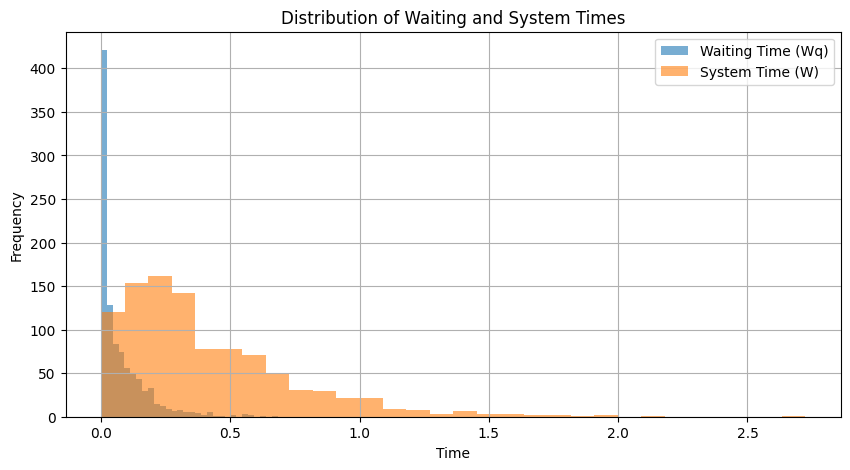

In [ ]:
# testing the simulation
sim = MMcQueueSimulatorHeap(lam=10, mu=3, c=3, max_customers=1000, seed=42)
sim.simulate()
sim.results()
sim.plot()